# Train Custom Model Using Scikit Learn - Squat
## 1. Read in Collected Data and Process

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

In [19]:
df = pd.read_csv('squat_coords_merged_2.csv')

In [20]:
df.head(3)

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,Knee genu valgus,0.699415,0.472646,-0.324136,0.999998,0.711245,0.475893,-0.316260,0.999991,0.711538,...,0.164860,0.908789,0.249807,0.510341,0.072750,0.991892,0.247929,0.441768,0.090583,0.990004
1,Knee genu valgus,0.671820,0.474318,-0.405106,0.999997,0.683577,0.477208,-0.394096,0.999989,0.683907,...,0.175709,0.888038,0.250171,0.510904,0.102666,0.989249,0.248508,0.442341,0.080046,0.987026
2,Knee genu valgus,0.608768,0.477532,-0.487955,0.999995,0.619720,0.481079,-0.470730,0.999984,0.620161,...,-0.021946,0.882665,0.250157,0.510287,-0.179990,0.981750,0.247894,0.442892,-0.163980,0.983903


In [ ]:
print(df['class'].unique())

['Knee genu valgus' 'Shifting weight to left side']


In [22]:
df[df['class'] == 'Knee genu valgus']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,Knee genu valgus,0.699415,0.472646,-0.324136,0.999998,0.711245,0.475893,-0.316260,0.999991,0.711538,...,0.164860,0.908789,0.249807,0.510341,0.072750,0.991892,0.247929,0.441768,0.090583,0.990004
1,Knee genu valgus,0.671820,0.474318,-0.405106,0.999997,0.683577,0.477208,-0.394096,0.999989,0.683907,...,0.175709,0.888038,0.250171,0.510904,0.102666,0.989249,0.248508,0.442341,0.080046,0.987026
2,Knee genu valgus,0.608768,0.477532,-0.487955,0.999995,0.619720,0.481079,-0.470730,0.999984,0.620161,...,-0.021946,0.882665,0.250157,0.510287,-0.179990,0.981750,0.247894,0.442892,-0.163980,0.983903
3,Knee genu valgus,0.589975,0.477737,-0.509913,0.999996,0.601480,0.481423,-0.491207,0.999988,0.601968,...,-0.034158,0.898581,0.250489,0.510062,-0.189356,0.982554,0.247617,0.441711,-0.177027,0.985184
4,Knee genu valgus,0.572773,0.477706,-0.459133,0.999996,0.583862,0.481355,-0.441227,0.999990,0.584291,...,-0.052558,0.909526,0.251534,0.510199,-0.186784,0.980218,0.247483,0.440736,-0.185878,0.985082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Knee genu valgus,0.750818,0.472072,-0.433675,0.999994,0.763801,0.475715,-0.417285,0.999977,0.764121,...,0.194107,0.889605,0.250286,0.512239,0.070597,0.983610,0.246153,0.444716,0.048487,0.985566
152,Knee genu valgus,0.743593,0.469500,-0.442464,0.999994,0.756644,0.472725,-0.427610,0.999976,0.756955,...,0.195430,0.890272,0.251559,0.512162,0.064747,0.985431,0.248657,0.445459,0.050236,0.986450
153,Knee genu valgus,0.739580,0.468177,-0.494725,0.999993,0.752282,0.471128,-0.483344,0.999973,0.752879,...,0.188435,0.894059,0.251512,0.512086,0.042518,0.987412,0.249803,0.444929,0.042134,0.987837
154,Knee genu valgus,0.739344,0.468071,-0.470943,0.999994,0.751814,0.471160,-0.458972,0.999974,0.752364,...,0.164105,0.899102,0.251118,0.512057,0.031026,0.988842,0.249891,0.444280,0.017474,0.989124


In [23]:
X = df.drop('class', axis=1)
y = df['class']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2. Train Machine Learning Classification Model

In [25]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [26]:
fit_models = {}
for algorithm, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algorithm] = model

In [27]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=1000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [28]:
fit_models['rc'].predict(X_test)

array(['Shifting weight to left side', 'Knee genu valgus',
       'Shifting weight to left side', 'Knee genu valgus',
       'Knee genu valgus', 'Shifting weight to left side',
       'Shifting weight to left side', 'Shifting weight to left side',
       'Shifting weight to left side', 'Knee genu valgus',
       'Shifting weight to left side', 'Shifting weight to left side',
       'Shifting weight to left side', 'Knee genu valgus',
       'Shifting weight to left side', 'Knee genu valgus',
       'Knee genu valgus', 'Knee genu valgus', 'Knee genu valgus',
       'Knee genu valgus', 'Knee genu valgus',
       'Shifting weight to left side', 'Knee genu valgus',
       'Shifting weight to left side', 'Knee genu valgus',
       'Shifting weight to left side', 'Knee genu valgus',
       'Knee genu valgus', 'Knee genu valgus',
       'Shifting weight to left side', 'Shifting weight to left side',
       'Shifting weight to left side', 'Shifting weight to left side',
       'Shifting weight 

## 3.Evaluate and Serialize Model

In [29]:
from sklearn.metrics import classification_report

# 예측 결과를 저장할 딕셔너리 초기화
predictions = {}

# 각 모델에 대해 예측 수행
for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)  # 테스트 데이터에 대한 예측
    predictions[algorithm] = y_pred  # 예측 결과 저장

# 각 모델의 분류 보고서 출력
for algorithm, y_pred in predictions.items():
    print(f'--- {algorithm} 모델 분류 결과 평가 ---')
    print(classification_report(y_test, y_pred))
    print()

--- lr 모델 분류 결과 평가 ---
                              precision    recall  f1-score   support

            Knee genu valgus       1.00      1.00      1.00        51
Shifting weight to left side       1.00      1.00      1.00        48

                    accuracy                           1.00        99
                   macro avg       1.00      1.00      1.00        99
                weighted avg       1.00      1.00      1.00        99


--- rc 모델 분류 결과 평가 ---
                              precision    recall  f1-score   support

            Knee genu valgus       1.00      1.00      1.00        51
Shifting weight to left side       1.00      1.00      1.00        48

                    accuracy                           1.00        99
                   macro avg       1.00      1.00      1.00        99
                weighted avg       1.00      1.00      1.00        99


--- rf 모델 분류 결과 평가 ---
                              precision    recall  f1-score   support

            

In [30]:
metrics = {
    'accuracy': {},
    'precision': {},
    'recall': {},
    'f1-score': {}
}

for algorithm, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics['accuracy'][algorithm] = accuracy
    metrics['precision'][algorithm] = precision
    metrics['recall'][algorithm] = recall
    metrics['f1-score'][algorithm] = f1

for metric, values in metrics.items():
    print(f'--- {metric} ---')
    for algorithm, score in values.items():
        print(f'{algorithm}: {score:.4f}')

--- accuracy ---
lr: 1.0000
rc: 1.0000
rf: 1.0000
gb: 1.0000
--- precision ---
lr: 1.0000
rc: 1.0000
rf: 1.0000
gb: 1.0000
--- recall ---
lr: 1.0000
rc: 1.0000
rf: 1.0000
gb: 1.0000
--- f1-score ---
lr: 1.0000
rc: 1.0000
rf: 1.0000
gb: 1.0000


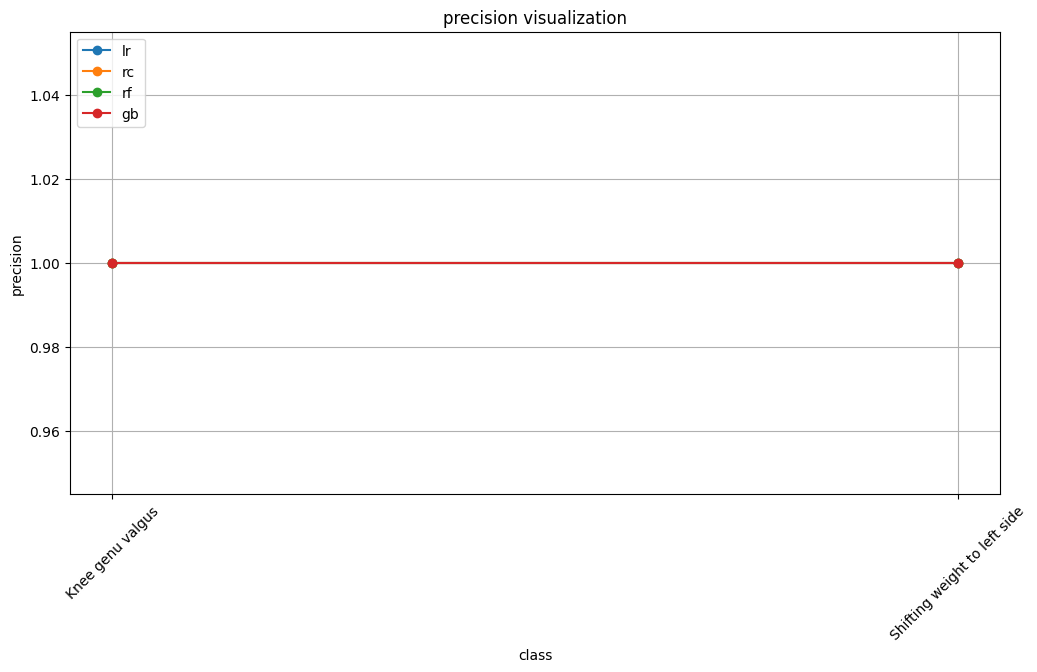

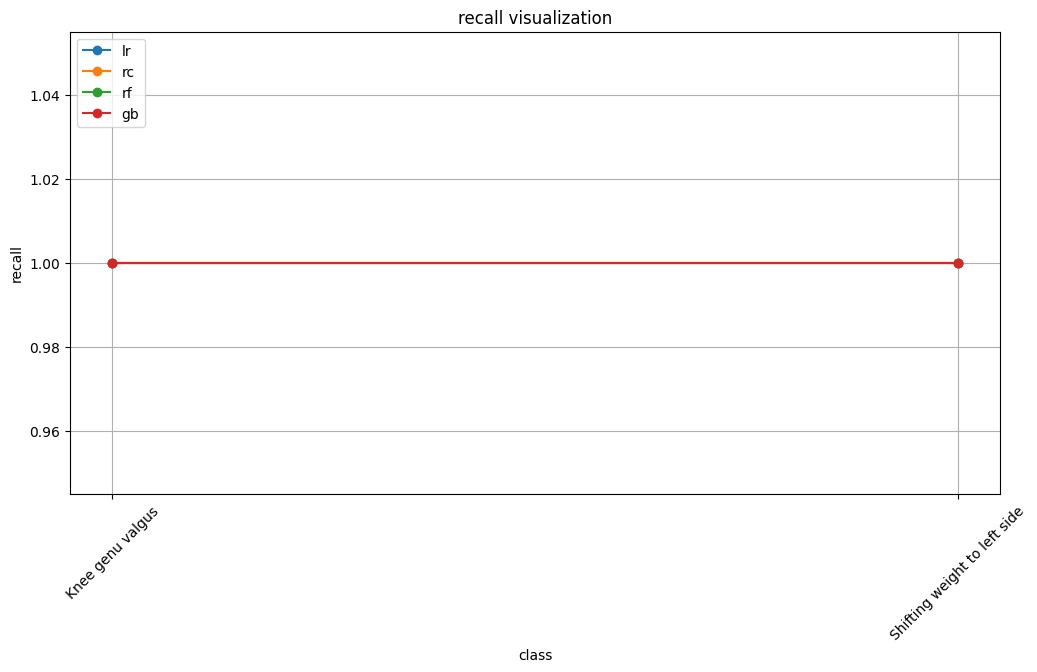

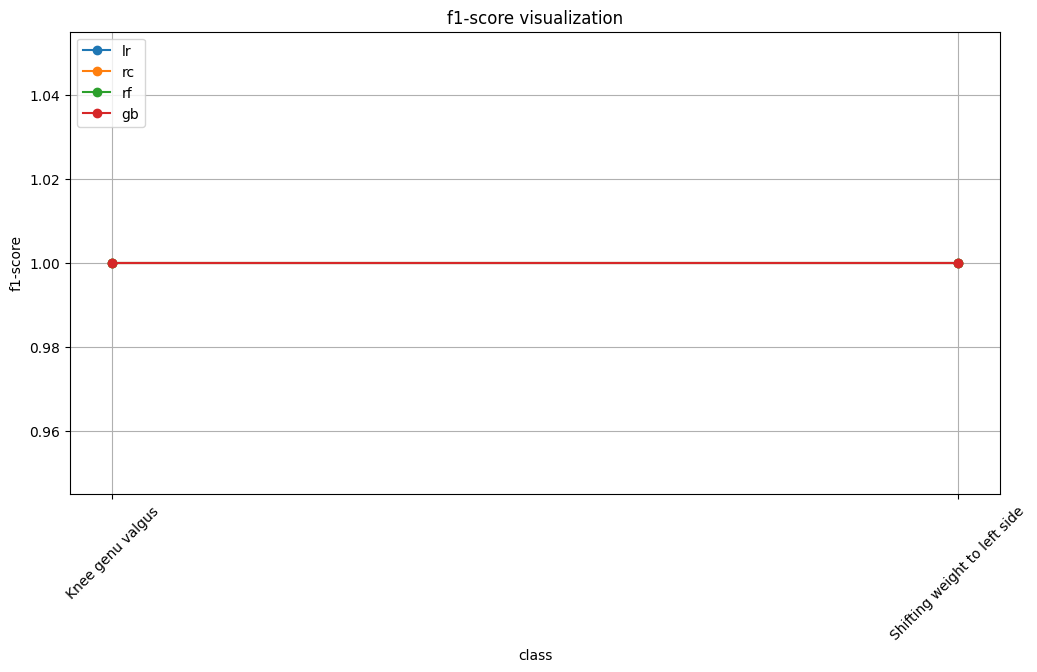

In [31]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

predictions = {}

# 각 모델에 대해 예측 수행
for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)  # 테스트 데이터에 대한 예측
    predictions[algorithm] = y_pred  # 예측 결과 저장

# 평가 지표 시각화
metrics = ['precision', 'recall', 'f1-score']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.title(f'{metric} visualization')

    for algorithm, y_pred in predictions.items():
        report = classification_report(y_test, y_pred, output_dict=True)
        metric_score = [report[label][metric] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]
        plt.plot(df['class'].unique(), metric_score, label=algorithm, marker='o', linestyle='-')

    plt.xlabel('class')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

## 4. Make Detections with Model

In [32]:
with open('squat_merged_2.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

In [33]:
import pickle
with open("squat_merged_2.pkl","rb") as f:
    clf_phase = pickle.load(f)
print(clf_phase.classes_)


['Knee genu valgus' 'Shifting weight to left side']
